In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [2]:
sns.set_palette("colorblind")

# Colorblind palette
palette=["#0099CC", # Blue
        "#FFC400",  # Yellow
        "#8B9467",  # Olive
        "#0097A7",  # Teal
        "#FF69B4",  # Pink
        "#666666",  # Gray
        "#CC6600"]  # Brown-Orange

In [3]:
survey_form_path = os.path.join(os.getcwd(), 'datasets/survey.csv')

In [4]:
survey_df = pd.read_csv(survey_form_path)
survey_df.head()

,How often do you clean your keyboard?,How often do you use a public keyboard?,"When you clean your keyboard, how long does it take?",Is it pleasant or demanding to clean and sanitize your keyboard?,"On a scale of 1 to 5 (5 being you care a lot), how much do you care for a clean and sanitized keyboard?","After seeing this statistic, on a scale of 1 to 5 (5 being you care a lot), how much do you care to have the public keyboards that you use cleaned and sanitized?",What other products have you bought for keyboard cleaning? Answer 'None' if you have never bought keyboard specific cleaning products.,What features would you like to see in an autonomous keyboard cleaner?,"On a scale of 1 to 5 (5 being very comfortable), how comfortable are you with a robot being used in your office space/library/lab?","For cleaning, do you prefer if a human or a robot does it?","On a scale of 1 to 5 (5 being the best), how satisfied are you with the cleaning and sanitizing job?","On a scale of 1 to 5 (5 being the best), how satisfied are you with how fast the robot comes?","On a scale of 1 to 5 (5 being very easy), how easy was it to call the robot from the web app?","On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the web app?","On a scale of 1 to 5 (5 being the best), how satisfied are you with the functionality of the web app?","On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the admin dashboard?","On a scale of 1 to 5 (5 being the best), how informative is the admin dashboard?",What visual data would you want present in the admin dashboard?,"After observing the web app and robot integration, do you have any comments or suggestions for the product?"
0,Every month,2-3x a week,Less than 1 minute,"I do not clean it, I would not know",1,2,NaN,Low cost,5,Do not care,3,3,4,5,5,4,5,Nope,Nope
1,Every 3+ months,Almost every day,More than 10 mins,Demanding,4,4,NaN,Cleaning underneath the keys,5,Do not care,3,2,5,5,4,4,4,Support for multiple robots?,UI said keyboard was cleaned before the robot ...
2,Every 3+ months,Almost every day,1-5 mins,Demanding,3,5,"Not cleaning, but a keyboard protector",Easy to use,5,Do not care,5,4,5,5,5,5,4,"Essentially, whether it has been properly clea...",Make sure to let the user know how effective y...
3,Every week,2-3x a week,Less than 1 minute,Demanding,2,2,NaN,high speed. ability to clear up dried grime th...,3,Human should do it,3,4,5,4,5,3,3,I don’t believe I was shown the admin dashboard,no
4,Every week,No more than once a week,1-5 mins,Pleasant,4,5,Keyboard cleaning slime,Cleans properly,4,Do not care,4,4,5,4,5,4,4,Last cleaned date,Robot seems too big to be able to navigate bet...


In [5]:
TOTAL_NUM_RESPONSES = len(survey_df)

In [6]:
survey_df.columns

Index(['How often do you clean your keyboard?',
       'How often do you use a public keyboard?',
       'When you clean your keyboard, how long does it take?',
       'Is it pleasant or demanding to clean and sanitize your keyboard?',
       'On a scale of 1 to 5 (5 being you care a lot), how much do you care for a clean and sanitized keyboard?',
       'After seeing this statistic, on a scale of 1 to 5 (5 being you care a lot), how much do you care to have the public keyboards that you use cleaned and sanitized?',
       'What other products have you bought for keyboard cleaning? Answer 'None' if you have never bought keyboard specific cleaning products.',
       'What features would you like to see in an autonomous keyboard cleaner?',
       'On a scale of 1 to 5 (5 being very comfortable), how comfortable are you with a robot being used in your office space/library/lab?',
       'For cleaning, do you prefer if a human or a robot does it?',
       'On a scale of 1 to 5 (5 being the 

In [7]:
# Function to show both count and percentage
def autopct_format(pct, all_values):
    absolute = int(round(pct * sum(all_values) / 100.0))  # Convert percentage to actual count
    return f"{absolute}\n({pct:.1f}%)"  # Display count and percentage

In [8]:
def calculate_mean(x, y):
    return np.round((np.dot(x, y) / TOTAL_NUM_RESPONSES),2)

In [9]:
def calculate_median(x, y):
    if len(x) != len(y):
        raise ValueError("x and y must be of the same length")
    data = np.repeat(x, y)
    return np.median(data)

Market Research

Q1: How often do you clean your keyboards?  
Options:
- Every day
- Every week
- Every month
- Every 3+ months
- Never

In [10]:
q1_x_bins = ["Every day", "Every week", "Every month", "Every 3+ months", "Never"]

# Options that have not been picked even once, are shown with assigned count 0
q1_y_bins =survey_df["How often do you clean your keyboard?"].value_counts().reindex(q1_x_bins, fill_value=0)

survey_df["How often do you clean your keyboard?"].value_counts()

How often do you clean your keyboard?
Every 3+ months    7
Every month        4
Never              4
Every week         2
Name: count, dtype: int64

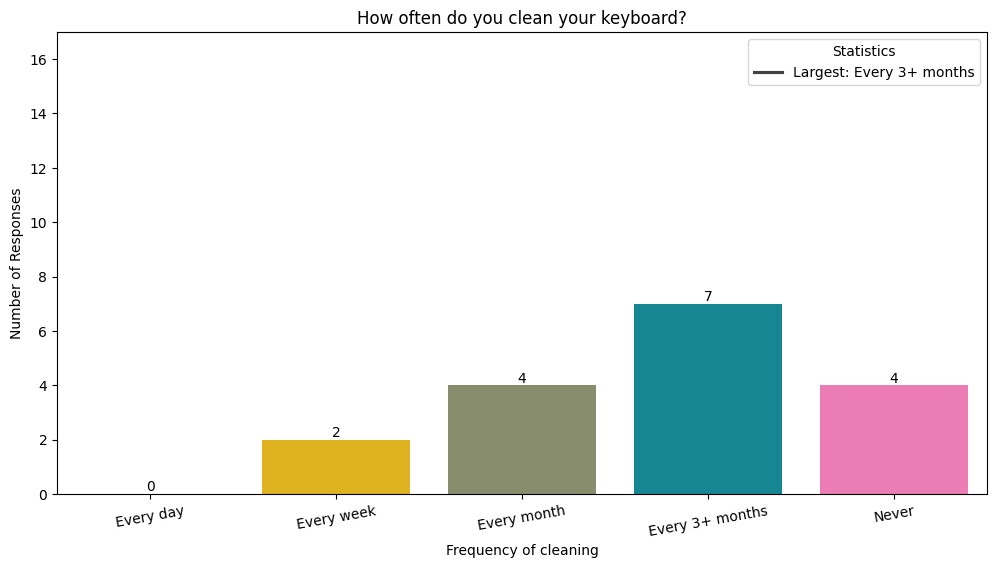

<Figure size 640x480 with 0 Axes>

In [11]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q1_x_bins, y=q1_y_bins, palette=palette)

# Largest Category
largest_category = q1_y_bins.idxmax()

for i, v in enumerate(q1_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks(rotation=10)
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Largest: {largest_category}"])
plt.xlabel("Frequency of cleaning")
plt.ylabel("Number of Responses")
plt.title("How often do you clean your keyboard?")
plt.show()
plt.tight_layout()

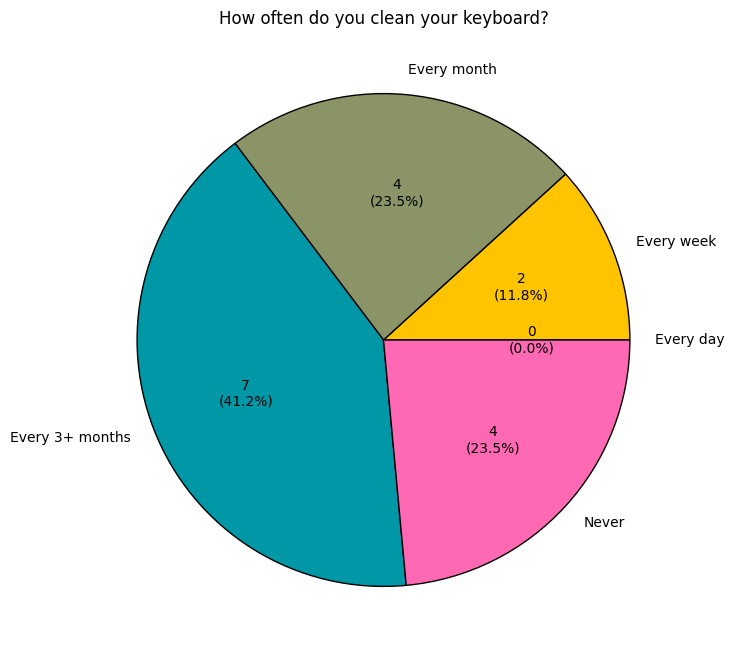

In [12]:
plt.figure(figsize=(10,8))
plt.pie(q1_y_bins, labels=q1_x_bins, autopct=lambda pct: autopct_format(pct, q1_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('How often do you clean your keyboard?')
plt.show()

Q2 How often do you use a public keyboard?  
Options:
- Almost every day
- 2-3x a week
- No more than once a week
- Once every 2 weeks
- Rarely
- Never

In [13]:
q2_x_bins = ["Almost every day", "2-3x a week", "No more than once a week", "Once every 2 weeks", "Rarely", "Never"]

# Options that have not been picked even once, are shown with assigned count 0
q2_y_bins =survey_df["How often do you use a public keyboard?"].value_counts().reindex(q2_x_bins, fill_value=0)

survey_df["How often do you use a public keyboard?"].value_counts()

How often do you use a public keyboard?
Almost every day            7
Rarely                      6
2-3x a week                 3
No more than once a week    1
Name: count, dtype: int64

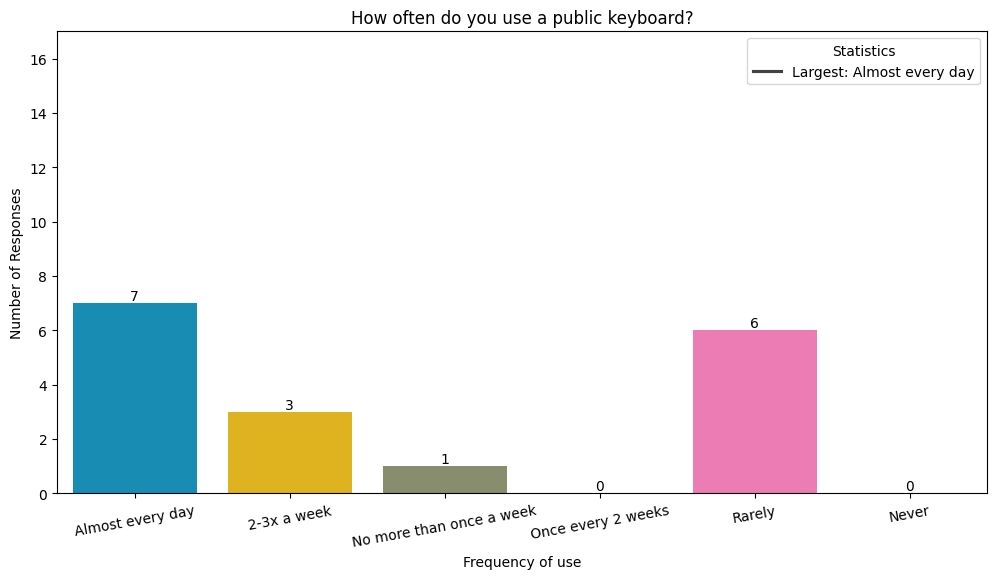

<Figure size 640x480 with 0 Axes>

In [14]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q2_x_bins, y=q2_y_bins, palette=palette)

# Largest Category
largest_category = q2_y_bins.idxmax()

for i, v in enumerate(q2_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks(rotation=10)
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Largest: {largest_category}"])
plt.xlabel("Frequency of use")
plt.ylabel("Number of Responses")
plt.title("How often do you use a public keyboard?")
plt.show()
plt.tight_layout()

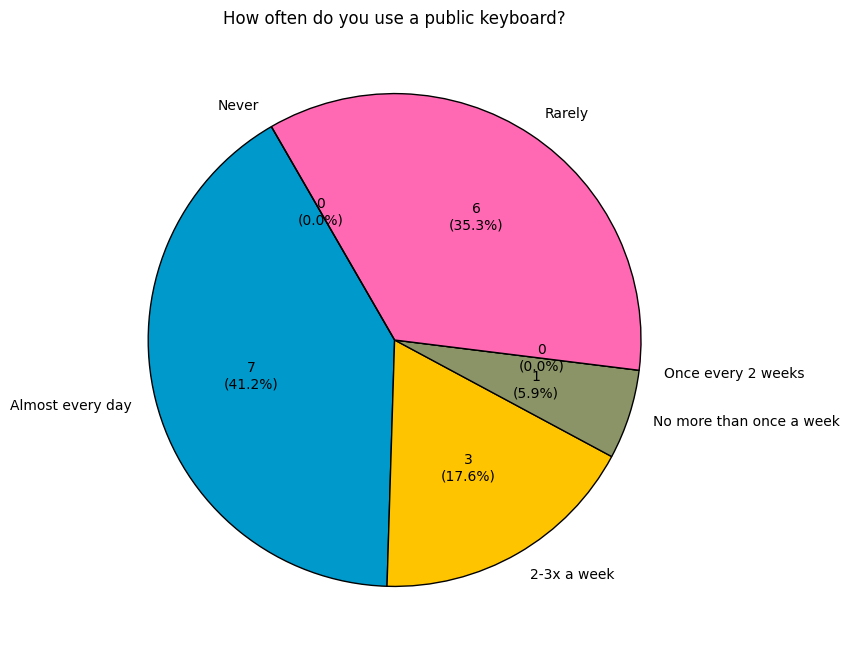

In [15]:
plt.figure(figsize=(10,8))
plt.pie(q2_y_bins, labels=q2_x_bins, autopct=lambda pct: autopct_format(pct, q2_y_bins), 
        colors=palette, startangle=120, wedgeprops={'edgecolor': 'black'})
plt.title('How often do you use a public keyboard?')
plt.show()

Q3. When you clean your keyboard, how long does it take?  
Options: 
- Less than 1 minute
- 1-5 mins
- 5-10 mins
- More than 10 mins
- I do not clean it, I do not know

In [16]:
q3_x_bins = ["Less than 1 minute", "1-5 mins", "5-10 mins", "More than 10 mins", "I do not clean it, I do not know"]

# Options that have not been picked even once, are shown with assigned count 0
q3_y_bins =survey_df["When you clean your keyboard, how long does it take?"].value_counts().reindex(q3_x_bins, fill_value=0)

survey_df["When you clean your keyboard, how long does it take?"].value_counts()

When you clean your keyboard, how long does it take?
1-5 mins                            5
I do not clean it, I do not know    4
Less than 1 minute                  3
More than 10 mins                   3
5-10 mins                           2
Name: count, dtype: int64

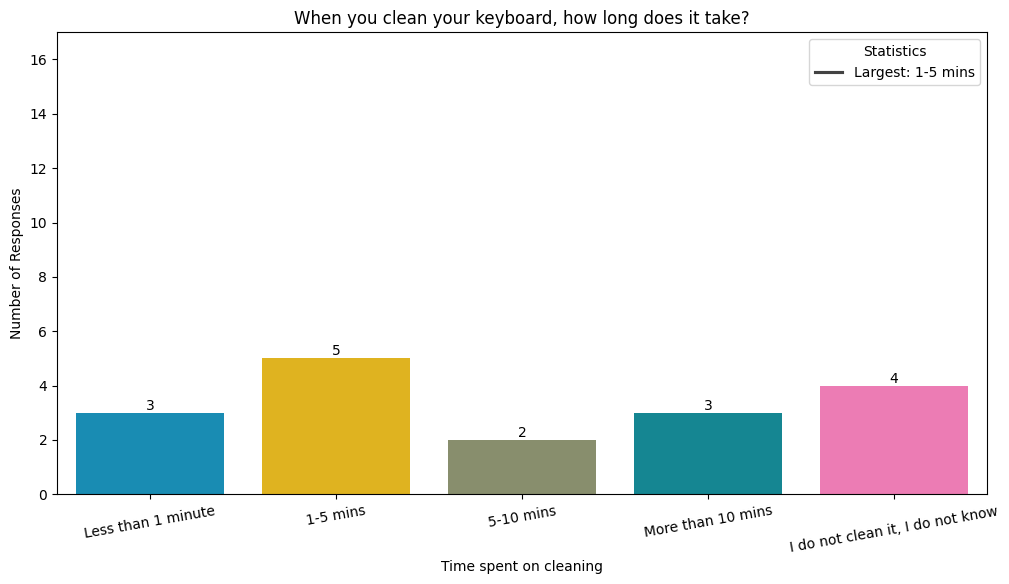

<Figure size 640x480 with 0 Axes>

In [17]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q3_x_bins, y=q3_y_bins, palette=palette)

# Largest Category
largest_category = q3_y_bins.idxmax()

for i, v in enumerate(q3_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks(rotation=10)
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Largest: {largest_category}"])
plt.xlabel("Time spent on cleaning")
plt.ylabel("Number of Responses")
plt.title("When you clean your keyboard, how long does it take?")
plt.show()
plt.tight_layout()

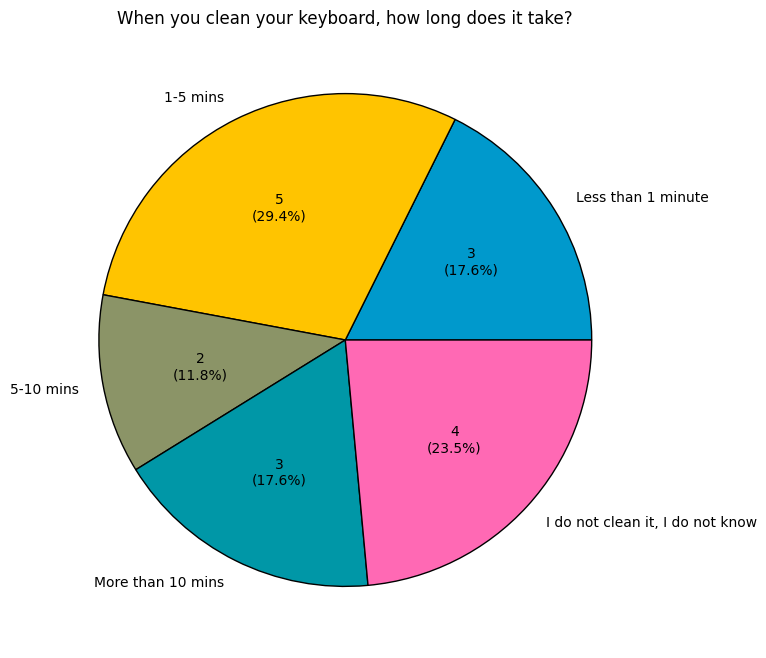

In [18]:
plt.figure(figsize=(10,8))
plt.pie(q3_y_bins, labels=q3_x_bins, autopct=lambda pct: autopct_format(pct, q3_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('When you clean your keyboard, how long does it take?')
plt.show()

Q4. Is it pleasant or demanding to clean and sanitize your keyboard?  
Options: 
- Pleasant
- Demanding
- I do not clean it, I would not know

In [19]:
q4_x_bins = ["Pleasant", "Demanding", "I do not clean it, I do not know"]

# Options that have not been picked even once, are shown with assigned count 0
q4_y_bins =survey_df["Is it pleasant or demanding to clean and sanitize your keyboard?"].value_counts().reindex(q4_x_bins, fill_value=0)

survey_df["Is it pleasant or demanding to clean and sanitize your keyboard?"].value_counts()

Is it pleasant or demanding to clean and sanitize your keyboard?
Demanding                              13
I do not clean it, I would not know     2
Pleasant                                2
Name: count, dtype: int64

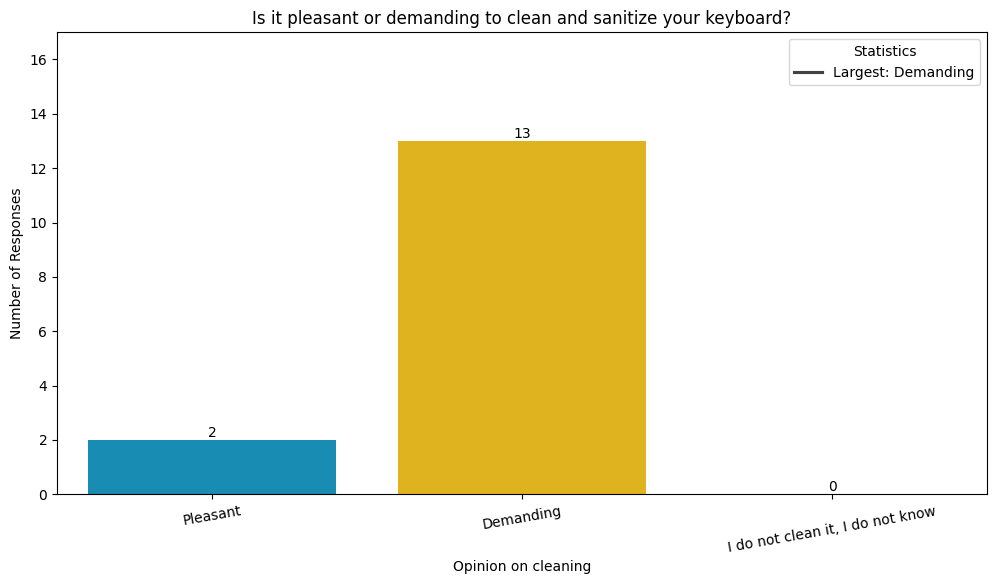

<Figure size 640x480 with 0 Axes>

In [20]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q4_x_bins, y=q4_y_bins, palette=palette)

# Largest Category
largest_category = q4_y_bins.idxmax()

for i, v in enumerate(q4_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks(rotation=10)
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Largest: {largest_category}"])
plt.xlabel("Opinion on cleaning")
plt.ylabel("Number of Responses")
plt.title("Is it pleasant or demanding to clean and sanitize your keyboard?")
plt.show()
plt.tight_layout()

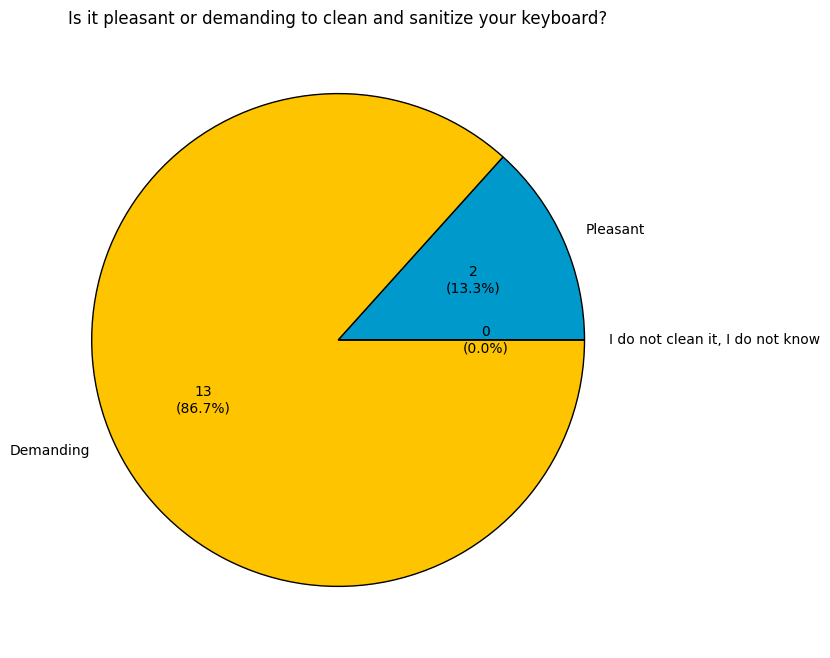

In [21]:
plt.figure(figsize=(10,8))
plt.pie(q4_y_bins, labels=q4_x_bins, autopct=lambda pct: autopct_format(pct, q4_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('Is it pleasant or demanding to clean and sanitize your keyboard?')
plt.show()

Q5. On a scale of 1 to 5 (5 being you care a lot), how much do you care for a clean and sanitized keyboard?

In [22]:
q5_x_bins = np.arange(1, 6)

# Options that have not been picked even once, are shown with assigned count 0
q5_y_bins = survey_df["On a scale of 1 to 5 (5 being you care a lot), how much do you care for a clean and sanitized keyboard?"].value_counts().reindex(q5_x_bins, fill_value=0)

survey_df["On a scale of 1 to 5 (5 being you care a lot), how much do you care for a clean and sanitized keyboard?"].value_counts()

On a scale of 1 to 5 (5 being you care a lot), how much do you care for a clean and sanitized keyboard?
3    7
2    3
4    3
5    3
1    1
Name: count, dtype: int64

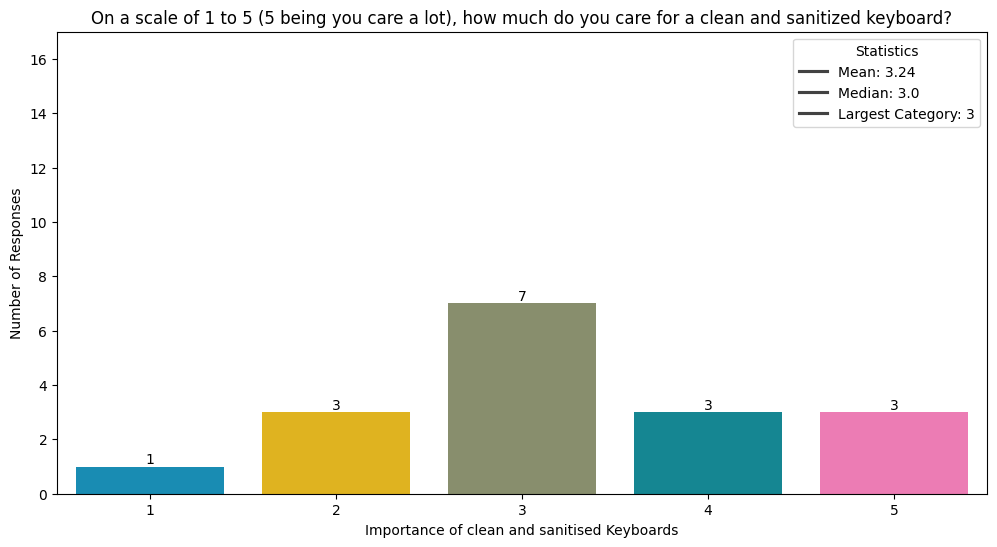

<Figure size 640x480 with 0 Axes>

In [23]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q5_x_bins, y=q5_y_bins, palette=palette)

# Mean Value
mean_value = calculate_mean(q5_x_bins, q5_y_bins)

# Median Value
median_value = calculate_median(q5_x_bins, q5_y_bins)

# Largest Category
largest_category = q5_y_bins.idxmax()

for i, v in enumerate(q5_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Mean: {mean_value}", f"Median: {median_value}", f"Largest Category: {largest_category}"])
plt.xlabel("Importance of clean and sanitised Keyboards")
plt.ylabel("Number of Responses")
plt.title("On a scale of 1 to 5 (5 being you care a lot), how much do you care for a clean and sanitized keyboard?")
plt.show()
plt.tight_layout()

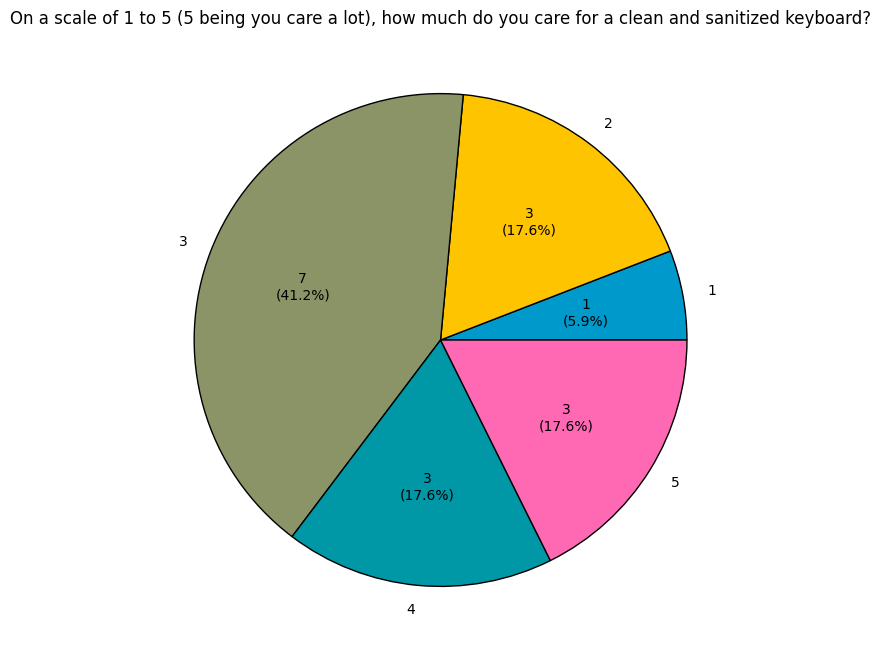

In [24]:
plt.figure(figsize=(10,8))
plt.pie(q5_y_bins, labels=q5_x_bins, autopct=lambda pct: autopct_format(pct, q5_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('On a scale of 1 to 5 (5 being you care a lot), how much do you care for a clean and sanitized keyboard?')
plt.show()

Q6. After seeing this statistic, on a scale of 1 to 5 (5 being you care a lot), how much do you care to have the public keyboards that you use cleaned and sanitized?

In [25]:
q6_x_bins = np.arange(1, 6)

# Options that have not been picked even once, are shown with assigned count 0
q6_y_bins = survey_df["After seeing this statistic, on a scale of 1 to 5 (5 being you care a lot), how much do you care to have the public keyboards that you use cleaned and sanitized?"].value_counts().reindex(q6_x_bins, fill_value=0)

survey_df["After seeing this statistic, on a scale of 1 to 5 (5 being you care a lot), how much do you care to have the public keyboards that you use cleaned and sanitized?"].value_counts()

After seeing this statistic, on a scale of 1 to 5 (5 being you care a lot), how much do you care to have the public keyboards that you use cleaned and sanitized?
4    7
5    7
2    2
3    1
Name: count, dtype: int64

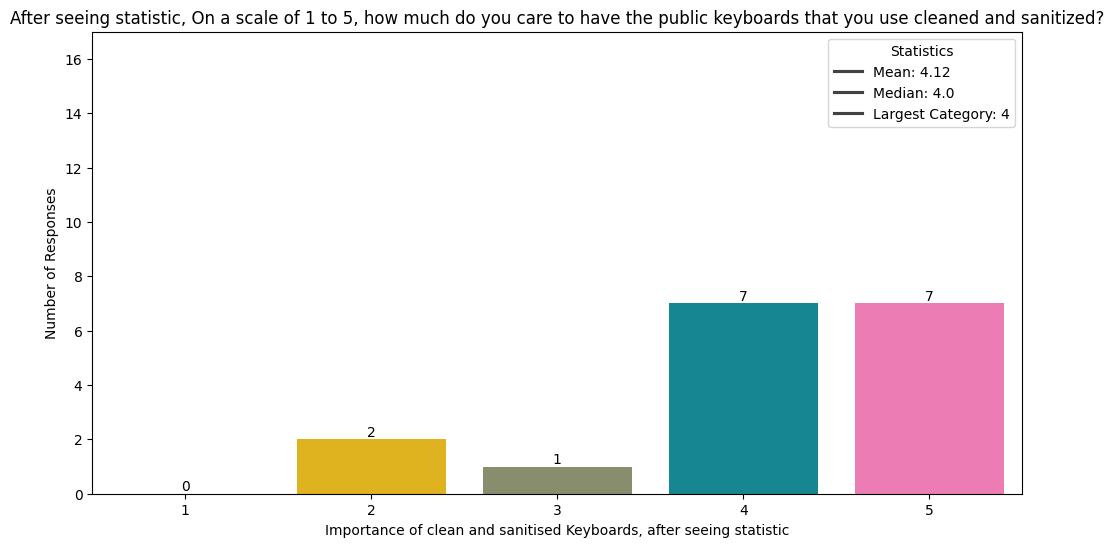

<Figure size 640x480 with 0 Axes>

In [26]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q6_x_bins, y=q6_y_bins, palette=palette)

# Mean Value
mean_value = calculate_mean(q6_x_bins, q6_y_bins)

# Median Value
median_value = calculate_median(q6_x_bins, q6_y_bins)


# Largest Category
largest_category = q6_y_bins.idxmax()

for i, v in enumerate(q6_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Mean: {mean_value}", f"Median: {median_value}", f"Largest Category: {largest_category}"])
plt.xlabel("Importance of clean and sanitised Keyboards, after seeing statistic")
plt.ylabel("Number of Responses")
plt.title("After seeing statistic, On a scale of 1 to 5, how much do you care to have the public keyboards that you use cleaned and sanitized?")
plt.show()
plt.tight_layout()

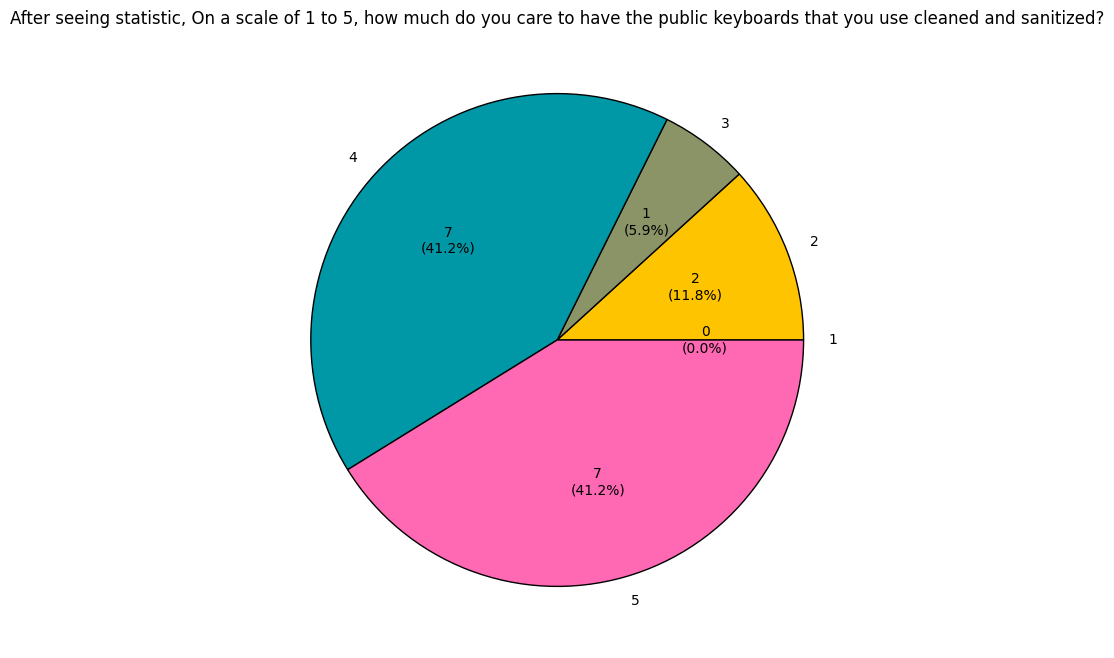

In [27]:
plt.figure(figsize=(10,8))
plt.pie(q6_y_bins, labels=q6_x_bins, autopct=lambda pct: autopct_format(pct, q6_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('After seeing statistic, On a scale of 1 to 5, how much do you care to have the public keyboards that you use cleaned and sanitized?')
plt.show()

Q9. On a scale of 1 to 5 (5 being very comfortable), how comfortable are you with a robot being used in your office space/library/lab?

In [28]:
q9_x_bins = np.arange(1, 6)

# Options that have not been picked even once, are shown with assigned count 0
q9_y_bins = survey_df["On a scale of 1 to 5 (5 being very comfortable), how comfortable are you with a robot being used in your office space/library/lab?"].value_counts().reindex(q9_x_bins, fill_value=0)

survey_df["On a scale of 1 to 5 (5 being very comfortable), how comfortable are you with a robot being used in your office space/library/lab?"].value_counts()

On a scale of 1 to 5 (5 being very comfortable), how comfortable are you with a robot being used in your office space/library/lab?
5    11
4     3
3     2
2     1
Name: count, dtype: int64

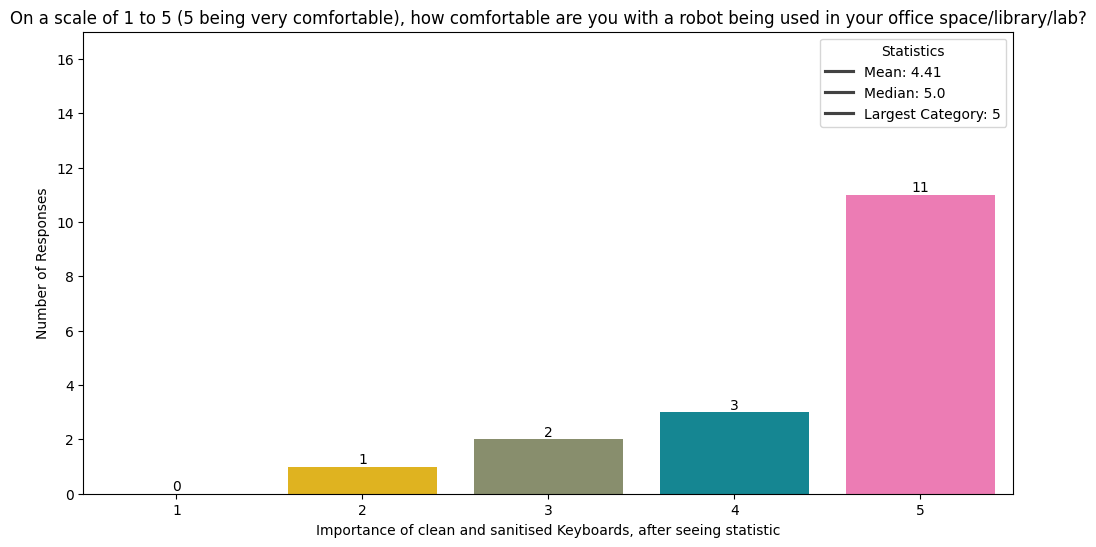

<Figure size 640x480 with 0 Axes>

In [29]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q9_x_bins, y=q9_y_bins, palette=palette)

# Mean Value
mean_value = calculate_mean(q9_x_bins, q9_y_bins)

# Median Value
median_value = calculate_median(q9_x_bins, q9_y_bins)


# Largest Category
largest_category = q9_y_bins.idxmax()

for i, v in enumerate(q9_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Mean: {mean_value}", f"Median: {median_value}", f"Largest Category: {largest_category}"])
plt.xlabel("Importance of clean and sanitised Keyboards, after seeing statistic")
plt.ylabel("Number of Responses")
plt.title("On a scale of 1 to 5 (5 being very comfortable), how comfortable are you with a robot being used in your office space/library/lab?")
plt.show()
plt.tight_layout()

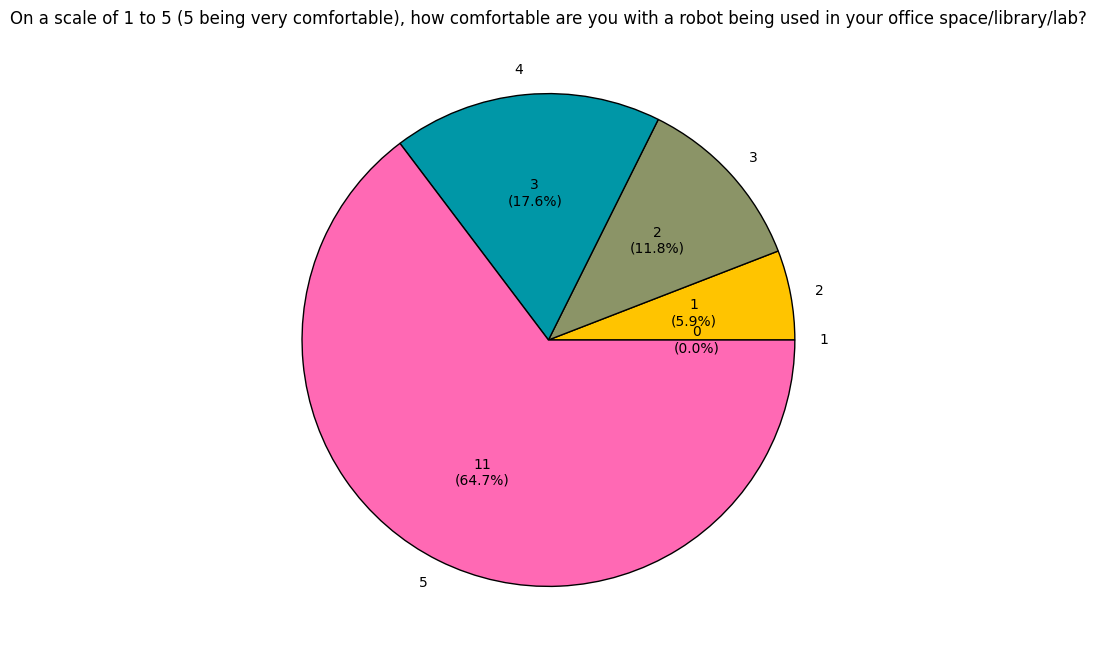

In [30]:
plt.figure(figsize=(10,8))
plt.pie(q9_y_bins, labels=q9_x_bins, autopct=lambda pct: autopct_format(pct, q9_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('On a scale of 1 to 5 (5 being very comfortable), how comfortable are you with a robot being used in your office space/library/lab?')
plt.show()


Q10. For cleaning, do you prefer if a human or a robot does it?

In [31]:
q10_x_bins = ["Human should do it", "Robot should do it", "Do not care"]

# Options that have not been picked even once, are shown with assigned count 0
q10_y_bins = survey_df["For cleaning, do you prefer if a human or a robot does it?"].value_counts().reindex(q10_x_bins, fill_value=0)

survey_df["For cleaning, do you prefer if a human or a robot does it?"].value_counts()

For cleaning, do you prefer if a human or a robot does it?
Do not care           13
Human should do it     2
Robot should do it     2
Name: count, dtype: int64

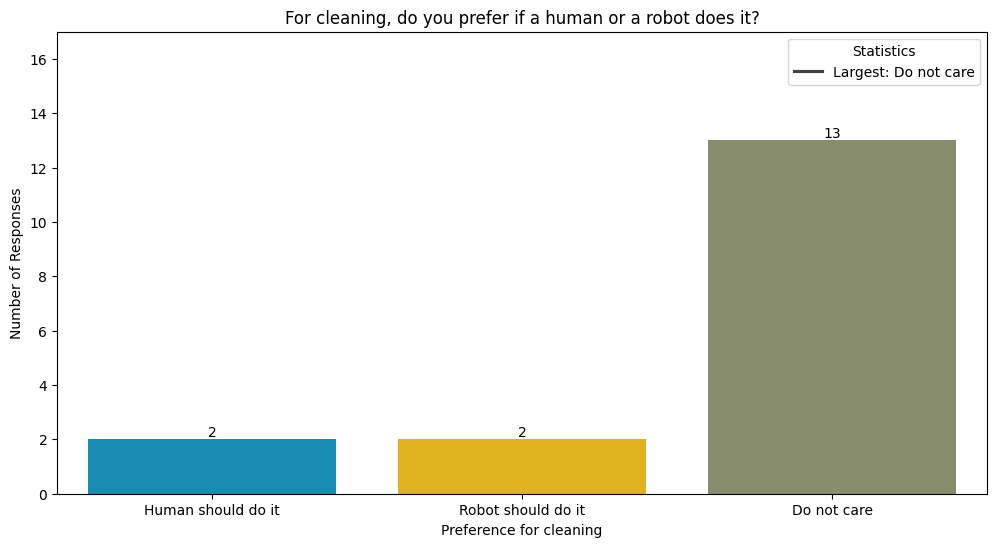

<Figure size 640x480 with 0 Axes>

In [32]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q10_x_bins, y=q10_y_bins, palette=palette)

# Largest Category
largest_category = q10_y_bins.idxmax()

for i, v in enumerate(q10_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Largest: {largest_category}"])
plt.xlabel("Preference for cleaning")
plt.ylabel("Number of Responses")
plt.title("For cleaning, do you prefer if a human or a robot does it?")
plt.show()
plt.tight_layout()

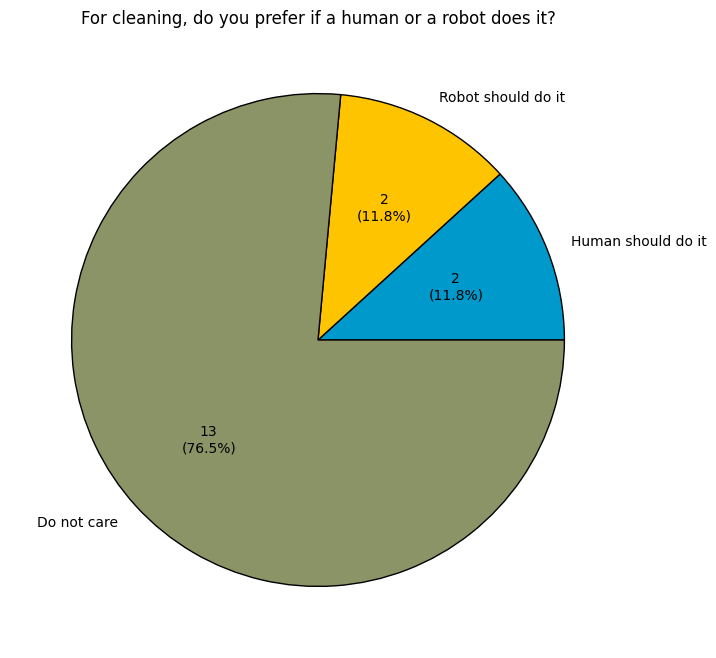

In [33]:
plt.figure(figsize=(10,8))
plt.pie(q10_y_bins, labels=q10_x_bins, autopct=lambda pct: autopct_format(pct, q10_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('For cleaning, do you prefer if a human or a robot does it?')
plt.show()


Q11. On a scale of 1 to 5 (5 being the best), how satisfied are you with the cleaning and sanitizing job?

In [34]:
q11_x_bins = np.arange(1, 6)

# Options that have not been picked even once, are shown with assigned count 0
q11_y_bins = survey_df["On a scale of 1 to 5 (5 being the best), how satisfied are you with the cleaning and sanitizing job?"].value_counts().reindex(q11_x_bins, fill_value=0)

survey_df["On a scale of 1 to 5 (5 being the best), how satisfied are you with the cleaning and sanitizing job?"].value_counts()

On a scale of 1 to 5 (5 being the best), how satisfied are you with the cleaning and sanitizing job?
3    8
4    6
5    2
2    1
Name: count, dtype: int64

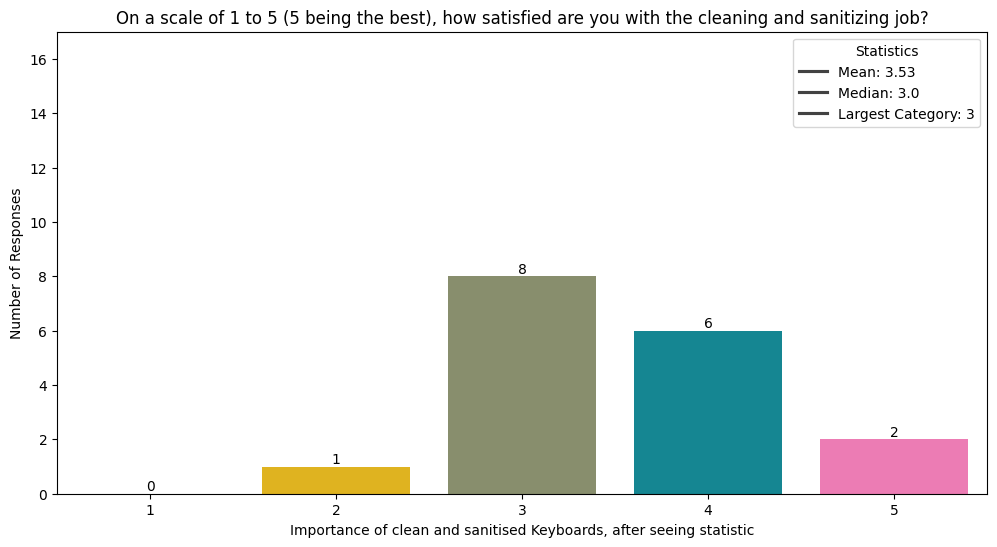

<Figure size 640x480 with 0 Axes>

In [35]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q11_x_bins, y=q11_y_bins, palette=palette)

# Mean Value
mean_value = calculate_mean(q11_x_bins, q11_y_bins)

# Median Value
median_value = calculate_median(q11_x_bins, q11_y_bins)


# Largest Category
largest_category = q11_y_bins.idxmax()

for i, v in enumerate(q11_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Mean: {mean_value}", f"Median: {median_value}", f"Largest Category: {largest_category}"])
plt.xlabel("Importance of clean and sanitised Keyboards, after seeing statistic")
plt.ylabel("Number of Responses")
plt.title("On a scale of 1 to 5 (5 being the best), how satisfied are you with the cleaning and sanitizing job?")
plt.show()
plt.tight_layout()

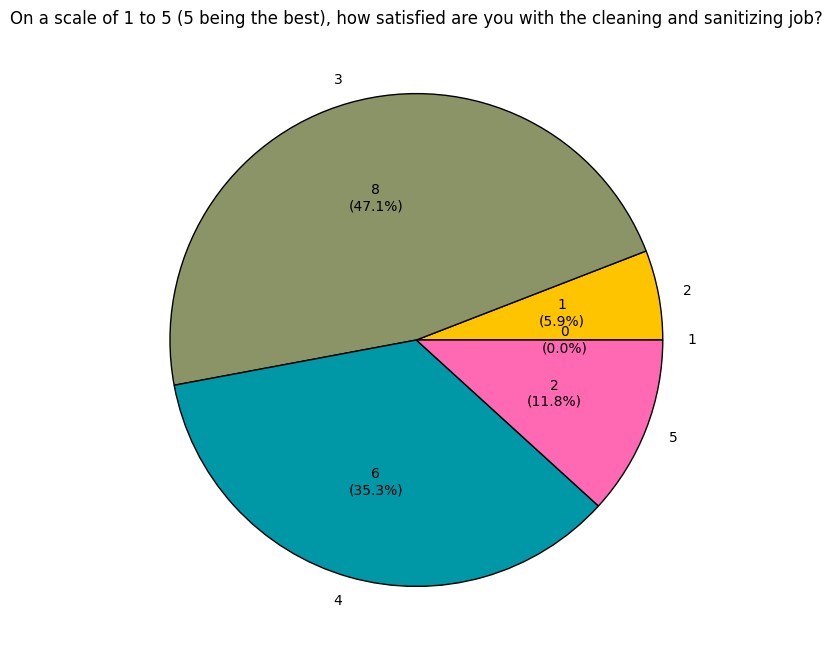

In [36]:
plt.figure(figsize=(10,8))
plt.pie(q11_y_bins, labels=q11_x_bins, autopct=lambda pct: autopct_format(pct, q11_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('On a scale of 1 to 5 (5 being the best), how satisfied are you with the cleaning and sanitizing job?')
plt.show()


Q12. On a scale of 1 to 5 (5 being the best), how satisfied are you with how fast the robot comes?

In [37]:
q12_x_bins = np.arange(1, 6)

# Options that have not been picked even once, are shown with assigned count 0
q12_y_bins = survey_df["On a scale of 1 to 5 (5 being the best), how satisfied are you with how fast the robot comes?"].value_counts().reindex(q12_x_bins, fill_value=0)

survey_df["On a scale of 1 to 5 (5 being the best), how satisfied are you with how fast the robot comes?"].value_counts()

On a scale of 1 to 5 (5 being the best), how satisfied are you with how fast the robot comes?
4    7
3    4
2    4
5    2
Name: count, dtype: int64

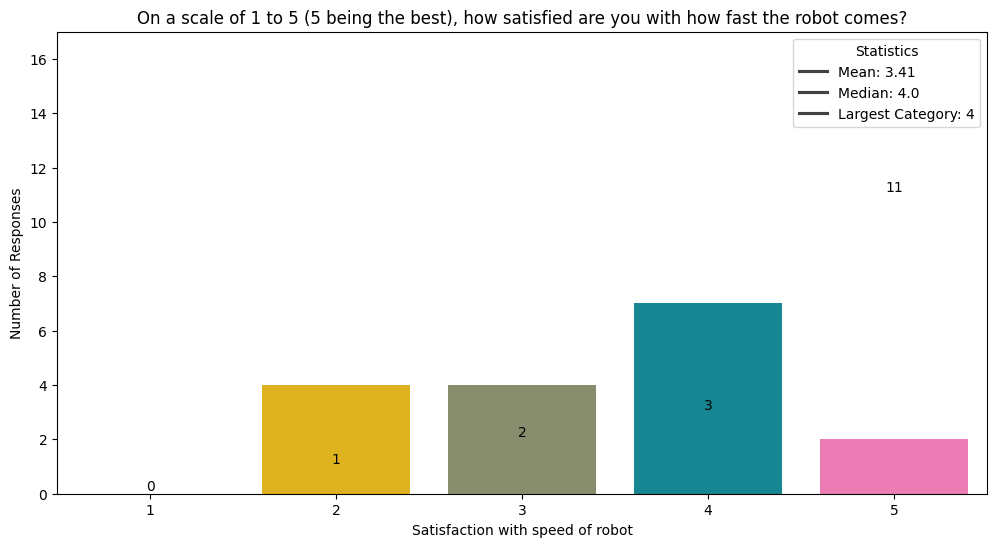

<Figure size 640x480 with 0 Axes>

In [38]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q12_x_bins, y=q12_y_bins, palette=palette)

# Mean Value
mean_value = calculate_mean(q12_x_bins, q12_y_bins)

# Median Value
median_value = calculate_median(q12_x_bins, q12_y_bins)


# Largest Category
largest_category = q12_y_bins.idxmax()

for i, v in enumerate(q9_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Mean: {mean_value}", f"Median: {median_value}", f"Largest Category: {largest_category}"])
plt.xlabel("Satisfaction with speed of robot")
plt.ylabel("Number of Responses")
plt.title("On a scale of 1 to 5 (5 being the best), how satisfied are you with how fast the robot comes?")
plt.show()
plt.tight_layout()

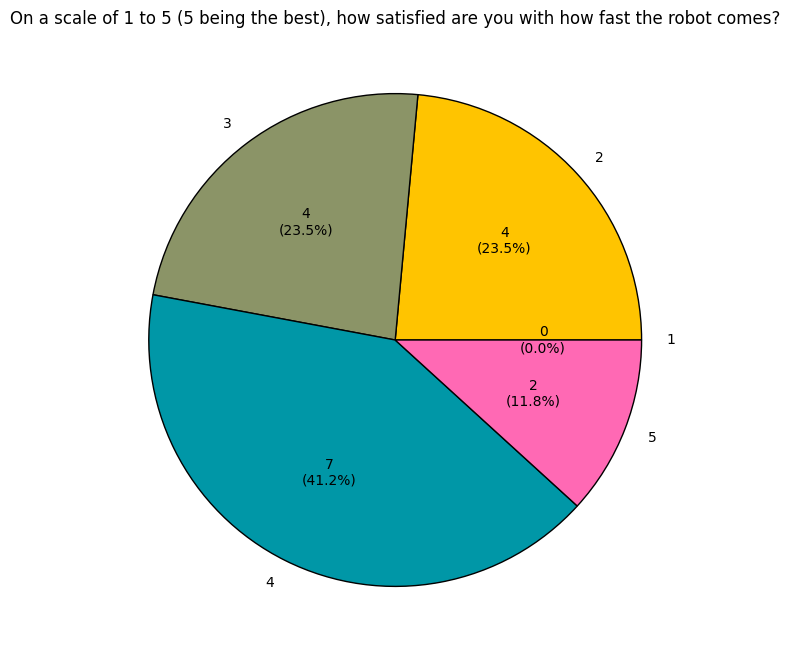

In [39]:
plt.figure(figsize=(10,8))
plt.pie(q12_y_bins, labels=q12_x_bins, autopct=lambda pct: autopct_format(pct, q12_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('On a scale of 1 to 5 (5 being the best), how satisfied are you with how fast the robot comes?')
plt.show()


Q13. On a scale of 1 to 5 (5 being very easy), how easy was it to call the robot from the web app?

In [40]:
q13_x_bins = np.arange(1, 6)

# Options that have not been picked even once, are shown with assigned count 0
q13_y_bins = survey_df["On a scale of 1 to 5 (5 being very easy), how easy was it to call the robot from the web app?"].value_counts().reindex(q13_x_bins, fill_value=0)

survey_df["On a scale of 1 to 5 (5 being very easy), how easy was it to call the robot from the web app?"].value_counts()

On a scale of 1 to 5 (5 being very easy), how easy was it to call the robot from the web app?
5    13
4     4
Name: count, dtype: int64

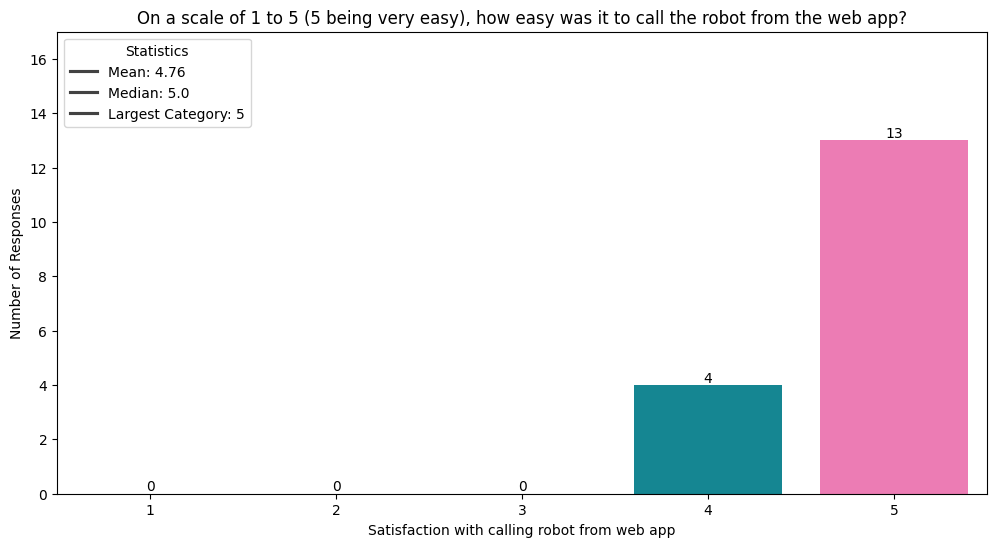

<Figure size 640x480 with 0 Axes>

In [41]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q13_x_bins, y=q13_y_bins, palette=palette)

# Mean Value
mean_value = calculate_mean(q13_x_bins, q13_y_bins)

# Median Value
median_value = calculate_median(q13_x_bins, q13_y_bins)


# Largest Category
largest_category = q13_y_bins.idxmax()

for i, v in enumerate(q13_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Mean: {mean_value}", f"Median: {median_value}", f"Largest Category: {largest_category}"])
plt.xlabel("Satisfaction with calling robot from web app")
plt.ylabel("Number of Responses")
plt.title("On a scale of 1 to 5 (5 being very easy), how easy was it to call the robot from the web app?")
plt.show()
plt.tight_layout()

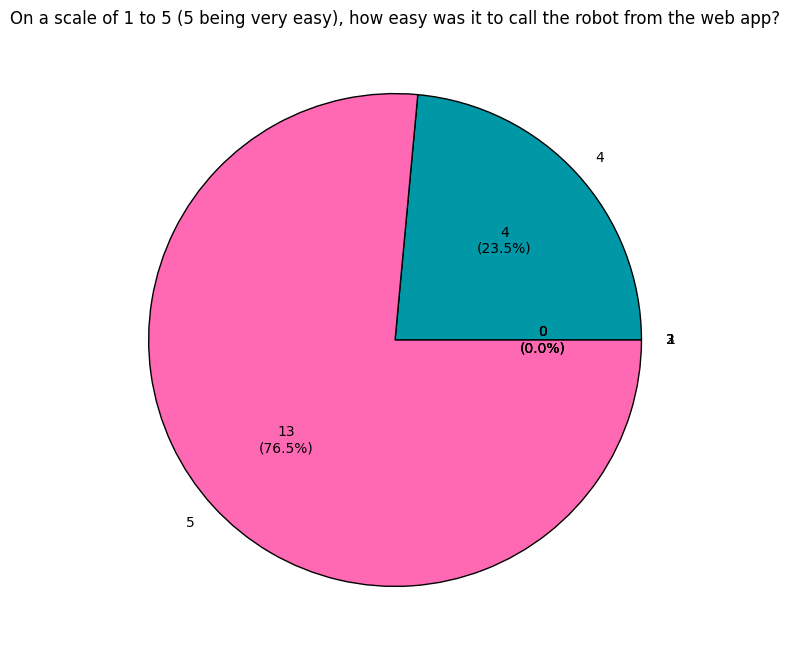

In [42]:
plt.figure(figsize=(10,8))
plt.pie(q13_y_bins, labels=q13_x_bins, autopct=lambda pct: autopct_format(pct, q13_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('On a scale of 1 to 5 (5 being very easy), how easy was it to call the robot from the web app?')
plt.show()


Q14. On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the web app?

In [43]:
q14_x_bins = np.arange(1, 6)

# Options that have not been picked even once, are shown with assigned count 0
q14_y_bins = survey_df["On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the web app?"].value_counts().reindex(q14_x_bins, fill_value=0)

survey_df["On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the web app?"].value_counts()

On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the web app?
4    9
5    7
3    1
Name: count, dtype: int64

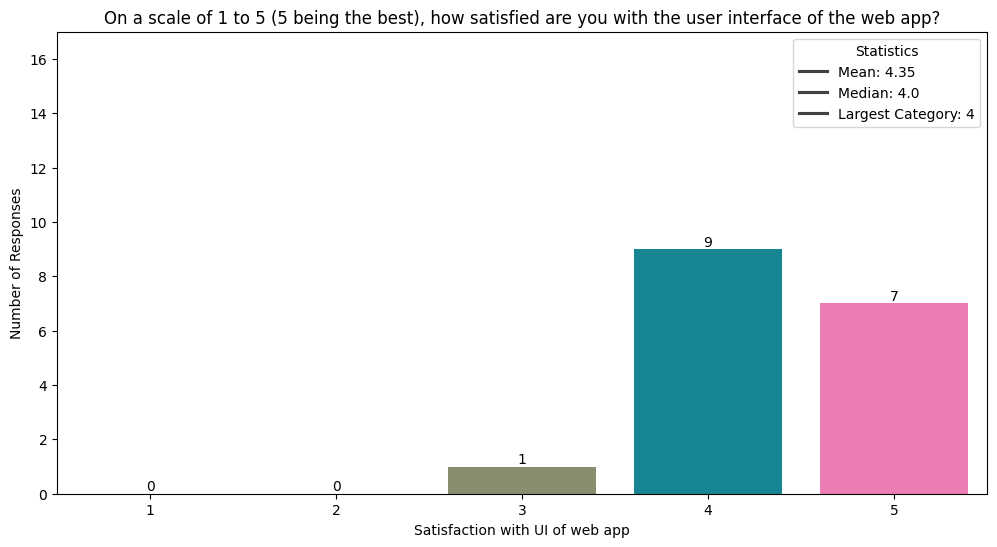

<Figure size 640x480 with 0 Axes>

In [44]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q14_x_bins, y=q14_y_bins, palette=palette)

# Mean Value
mean_value = calculate_mean(q14_x_bins, q14_y_bins)

# Median Value
median_value = calculate_median(q14_x_bins, q14_y_bins)


# Largest Category
largest_category = q14_y_bins.idxmax()

for i, v in enumerate(q14_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Mean: {mean_value}", f"Median: {median_value}", f"Largest Category: {largest_category}"])
plt.xlabel("Satisfaction with UI of web app")
plt.ylabel("Number of Responses")
plt.title("On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the web app?")
plt.show()
plt.tight_layout()

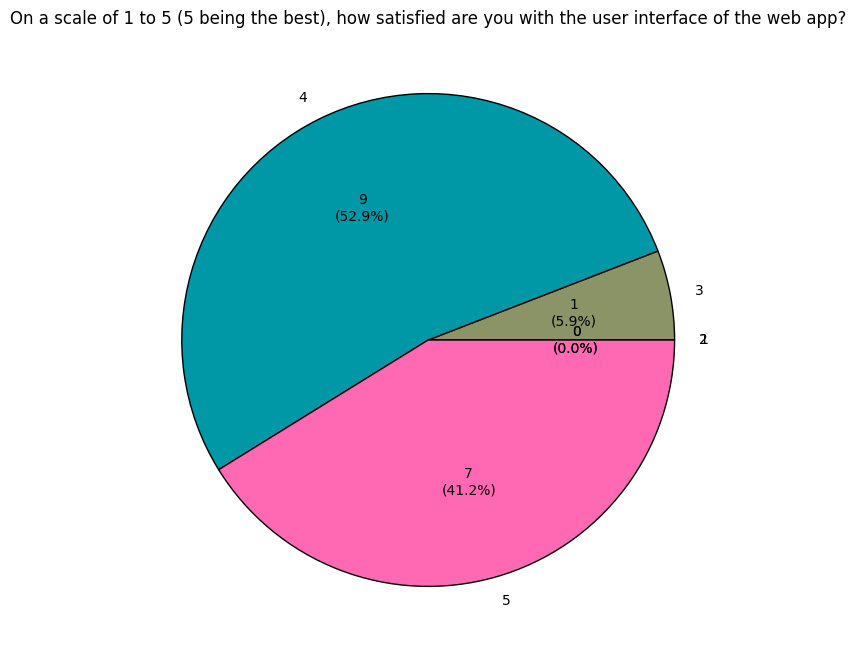

In [45]:
plt.figure(figsize=(10,8))
plt.pie(q14_y_bins, labels=q14_x_bins, autopct=lambda pct: autopct_format(pct, q14_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the web app?')
plt.show()


Q15. On a scale of 1 to 5 (5 being the best), how satisfied are you with the functionality of the web app?

In [46]:
q15_x_bins = np.arange(1, 6)

# Options that have not been picked even once, are shown with assigned count 0
q15_y_bins = survey_df["On a scale of 1 to 5 (5 being the best), how satisfied are you with the functionality of the web app?"].value_counts().reindex(q15_x_bins, fill_value=0)

survey_df["On a scale of 1 to 5 (5 being the best), how satisfied are you with the functionality of the web app?"].value_counts()

On a scale of 1 to 5 (5 being the best), how satisfied are you with the functionality of the web app?
5    12
4     3
3     2
Name: count, dtype: int64

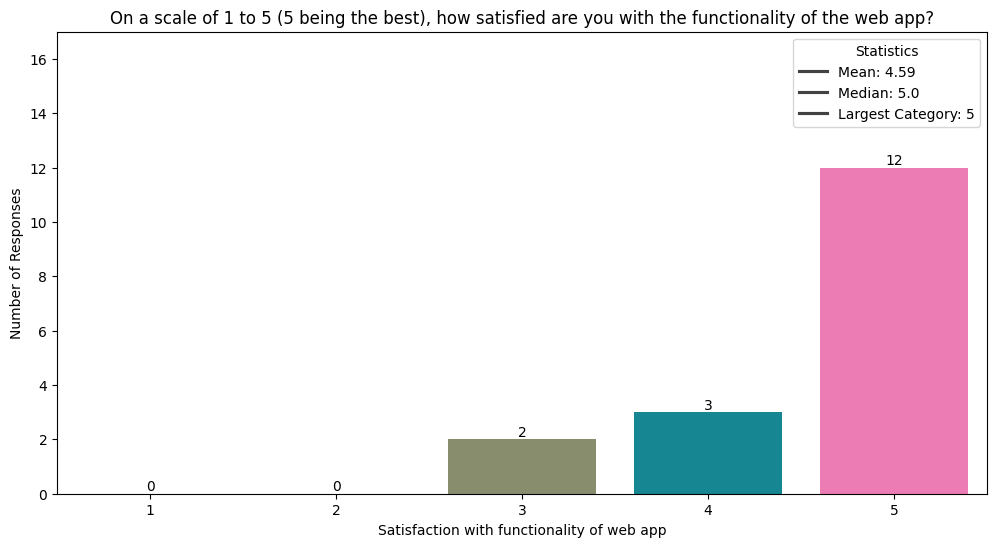

<Figure size 640x480 with 0 Axes>

In [47]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q15_x_bins, y=q15_y_bins, palette=palette)

# Mean Value
mean_value = calculate_mean(q15_x_bins, q15_y_bins)

# Median Value
median_value = calculate_median(q15_x_bins, q15_y_bins)


# Largest Category
largest_category = q15_y_bins.idxmax()

for i, v in enumerate(q15_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Mean: {mean_value}", f"Median: {median_value}", f"Largest Category: {largest_category}"])
plt.xlabel("Satisfaction with functionality of web app")
plt.ylabel("Number of Responses")
plt.title("On a scale of 1 to 5 (5 being the best), how satisfied are you with the functionality of the web app?")
plt.show()
plt.tight_layout()

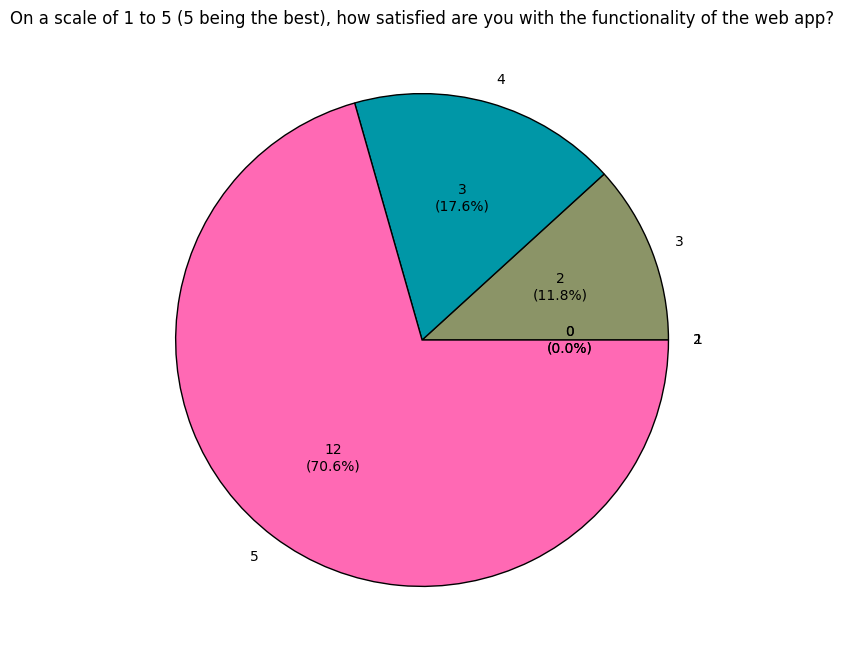

In [48]:
plt.figure(figsize=(10,8))
plt.pie(q15_y_bins, labels=q15_x_bins, autopct=lambda pct: autopct_format(pct, q15_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('On a scale of 1 to 5 (5 being the best), how satisfied are you with the functionality of the web app?')
plt.show()


Q16. On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the admin dashboard?

In [49]:
q16_x_bins = np.arange(1, 6)

# Options that have not been picked even once, are shown with assigned count 0
q16_y_bins = survey_df["On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the admin dashboard?"].value_counts().reindex(q16_x_bins, fill_value=0)

survey_df["On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the admin dashboard?"].value_counts()

On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the admin dashboard?
4    9
5    5
3    3
Name: count, dtype: int64

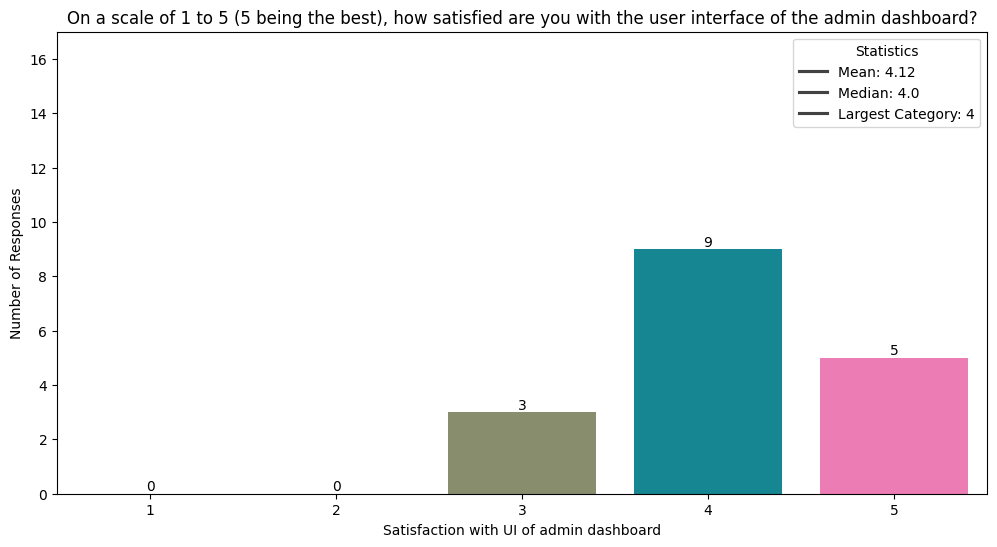

<Figure size 640x480 with 0 Axes>

In [50]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q16_x_bins, y=q16_y_bins, palette=palette)

# Mean Value
mean_value = calculate_mean(q16_x_bins, q16_y_bins)

# Median Value
median_value = calculate_median(q16_x_bins, q16_y_bins)


# Largest Category
largest_category = q16_y_bins.idxmax()

for i, v in enumerate(q16_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Mean: {mean_value}", f"Median: {median_value}", f"Largest Category: {largest_category}"])
plt.xlabel("Satisfaction with UI of admin dashboard")
plt.ylabel("Number of Responses")
plt.title("On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the admin dashboard?")
plt.show()
plt.tight_layout()

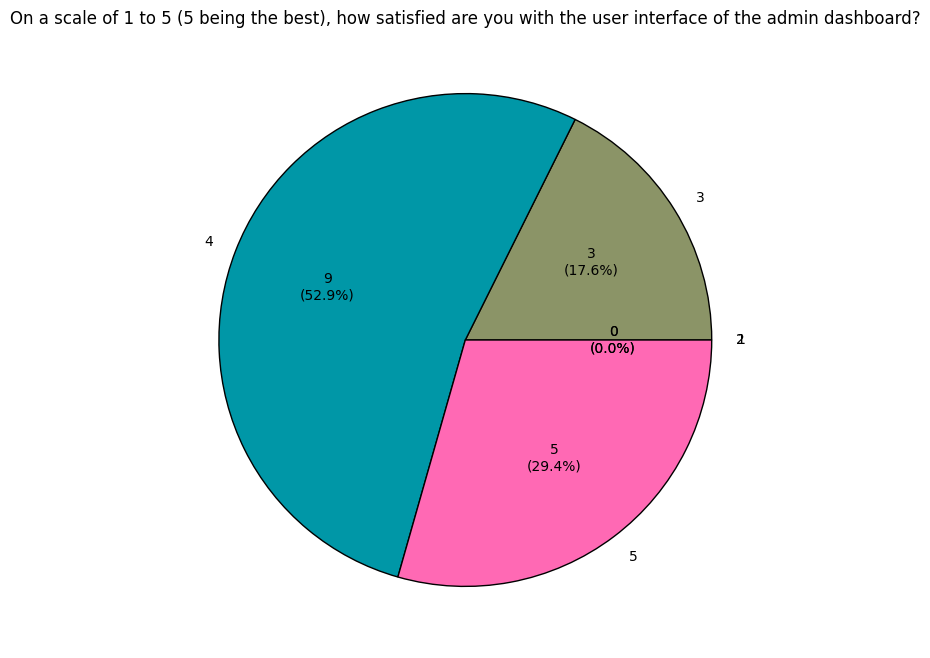

In [51]:
plt.figure(figsize=(10,8))
plt.pie(q16_y_bins, labels=q16_x_bins, autopct=lambda pct: autopct_format(pct, q16_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the admin dashboard?')
plt.show()


Q17. On a scale of 1 to 5 (5 being the best), how informative is the admin dashboard?

In [52]:
q17_x_bins = np.arange(1, 6)

# Options that have not been picked even once, are shown with assigned count 0
q17_y_bins = survey_df["On a scale of 1 to 5 (5 being the best), how informative is the admin dashboard?"].value_counts().reindex(q17_x_bins, fill_value=0)

survey_df["On a scale of 1 to 5 (5 being the best), how informative is the admin dashboard?"].value_counts()

On a scale of 1 to 5 (5 being the best), how informative is the admin dashboard?
4    8
5    6
3    3
Name: count, dtype: int64

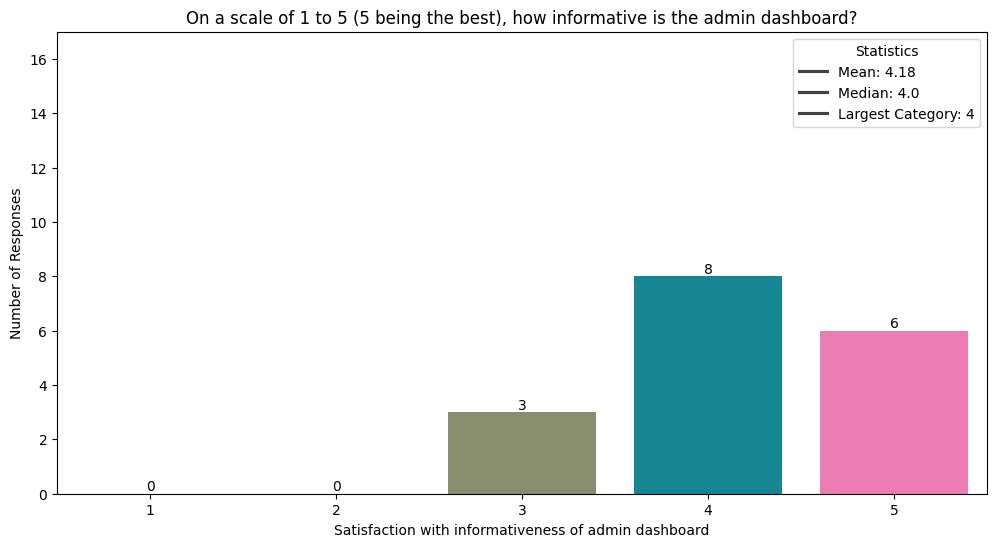

<Figure size 640x480 with 0 Axes>

In [53]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q17_x_bins, y=q17_y_bins, palette=palette)

# Mean Value
mean_value = calculate_mean(q17_x_bins, q17_y_bins)

# Median Value
median_value = calculate_median(q17_x_bins, q17_y_bins)


# Largest Category
largest_category = q17_y_bins.idxmax()

for i, v in enumerate(q17_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks()
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Mean: {mean_value}", f"Median: {median_value}", f"Largest Category: {largest_category}"])
plt.xlabel("Satisfaction with informativeness of admin dashboard")
plt.ylabel("Number of Responses")
plt.title("On a scale of 1 to 5 (5 being the best), how informative is the admin dashboard?")
plt.show()
plt.tight_layout()

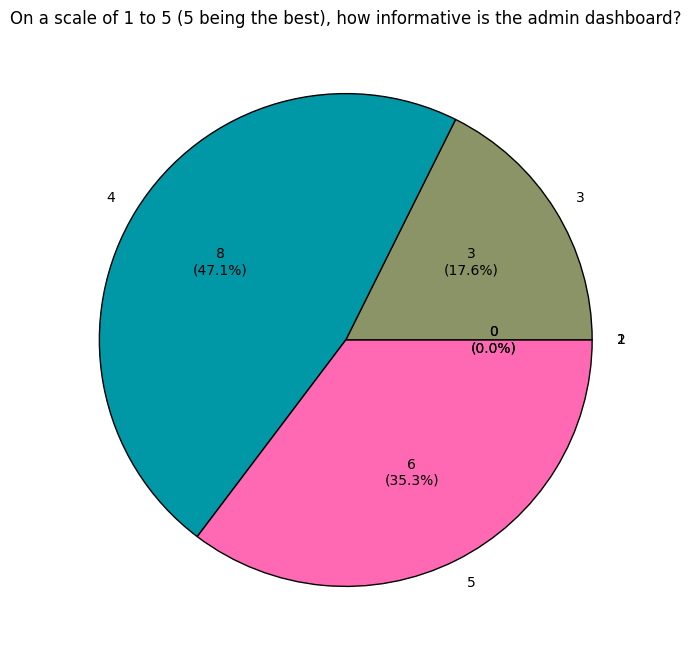

In [54]:
plt.figure(figsize=(10,8))
plt.pie(q17_y_bins, labels=q17_x_bins, autopct=lambda pct: autopct_format(pct, q17_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('On a scale of 1 to 5 (5 being the best), how informative is the admin dashboard?')
plt.show()
